# Stretch PIMU Guide: Interpreting Sensor Data

The Stretch Body Pimu package provides a Python API to the Stretch RE1 Power and IMU Board (PIMU). In this guide, we'll look at using the stretch_pimu_jog.py and stretch_pimu_scope.py files to get a idea about the status of base.

## Setup

Stretch Body is available on PyPi as [hello-robot-stretch-body](https://pypi.org/project/hello-robot-stretch-body/). An accompanying command-line tools package called [hello-robot-stretch-body-tools](https://pypi.org/project/hello-robot-stretch-body-tools/) uses Stretch Body to provide convenient scripts to interact with the robot from the command-line. Both come preinstalled on Stretch RE1, but the following command can be used to ensure you have the latest version.

In Jupyter notebooks, code preceded by `!` are run in the command-line instead of the Python interpreter.

In [1]:
!python -m pip install -q -U hello-robot-stretch-body
!python -m pip list | grep hello-robot-stretch-body

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
hello-robot-stretch-body           0.1.4
hello-robot-stretch-body-tools     0.1.3


In [ ]:
!python -m pip install -q -U hello-robot-stretch-body-tools
!python -m pip list | grep hello-robot-stretch-body-tools

# Stretch Body PIMU jog

The Stretch body PIMU jog file is available at stretch_body/tools/bin/stretch_pimu_jog.py, this file provides an easy way to interact with the Base board. This can be helpful to ping any componenet in the base board.

In [2]:
from stretch_body.pimu import Pimu
import time
from matplotlib import pyplot as plt

Now, we'll instantiate an object of Pimu and call it `p`.

In [3]:
p = Pimu()

The cell below displays the docstring for `startup()`. As you can see, the method returns a boolean depending on whether or not the class startup procedure succeeded. Only one instance of the pimu class can exist at once, so if another instance is running elsewhere, the method returns false.

In [4]:
p.startup?

Below, we make the call to `startup()`. As part of the startup procedure, this method opens serial ports to the hardware devices, loads the parameters that dictate robot behavior, and launches a few helper threads to poll for status in the background. If it successfully does that then it should return True.
If not check ##########################

In [5]:
p.startup()

True

If startup fails unexpectedly, the first thing to check is whether a background process is already running an instance of the robot class. Below we use the `pstree` command to list the tree of background processes, and `grep` to filter for scripts starting with "stretch_" (often the "stretch_xbox_controller_teleop.py" scripts is running in the background). If we see output below, we should use the `pkill` command to [terminate the conflicting process](https://docs.hello-robot.com/troubleshooting_guide/#rpc-transport-errors-stretch-doesnt-respond-to-commands).

In [ ]:
!pstree | grep stretch_

The second method we'll look at is called `stop()`. This method closes connections to all serial ports, releases other resources, and shuts down background threads. We'll wait until the end of the notebook to actually call the method.

In [ ]:
p.stop?

The next method we'll look at is called `pretty_print()`. This method prints out the entire state of the PIMU in a human readable format.

In [41]:
while True:
    p.pretty_print()

------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
------------------

Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.0944

AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.3513564

Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu 

Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event 

QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.06831040

Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 16286168

Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event C

Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.234333

Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On

QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.06831040

Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On 

Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.420257

QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.06831040

GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.009879237

Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.8390502929

Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event 

MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.006586158

QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.9970239

Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 16286168

AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.6720797

Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert 

QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.06831040

Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.02149883

MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.006586158

Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.02149883

Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event 

Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.02149883

Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.5132198

Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.5132198

Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.41461

AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU --------

GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.009879237

MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.006586158

MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.333212

State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.45760

Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On 

MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.394313

GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.008781543

Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 16286168

QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read error 0
Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.9970239

Board version: Pimu.Joplin.V1
Firmware version: Pimu.v0.0.1p0
----------IMU -------------
AX (m/s^2) 0.351356416941
AY (m/s^2) -0.672079741955
AZ (m/s^2) -9.79996681213
GX (rad/s) 0.00878154393286
GY (rad/s) 0.00987923704088
GZ (rad/s) 0.00658615818247
MX (uTesla) 9.39431381226
MY (uTesla) -1.33321201801
MZ (uTesla) 0.363369464874
QW -0.0284226313233
QX 0.997023999691
QY -0.0683104097843
QZ 0.0214988365769
Roll (deg) 3.42025756836
Pitch (deg) -2.23433327675
Heading (deg) 172.094421387
Bump 0.513219892979
Timestamp 1628616891.07
-----------------------
------ Pimu -----
Voltage 13.4146118164
Current 2.22626448992
CPU Temp 52.0
Board Temp 33.4576035157
State 128
At Cliff [False, False, False, False]
Cliff Range [185.59539794921875, 115.7095947265625, 183.4801025390625, 223.83905029296875]
Cliff Event False
Runstop Event False
Bump Event Cnt 44
Fan On False
Buzzer On True
Low Voltage Alert False
High Current Alert False
Over Tilt Alert False
Debug 1125662.0
Timestamp 1628616891.07
Read er

KeyboardInterrupt: 

we'd often like to be able to access the robot's state programmatically. The pull_status() method returns a dictionary with a snapshot of the current state of the PIMU. This can be accessed through the status dictionary and specifying the keyword. Here for example the status of fan is displayed.

In [7]:
p.pull_status()
p.status['fan_on']

False

In [9]:
p.trigger_beep()
p.push_command()

# User/Utlity Functions 

Next, let's take a look at how we can use the User and Utility Functions in the Pimu class to access PIMU board.

These functions are mostly designed to be used during normal operation of stretch body or during development/factory use.

IMU RESET: Toggles the reset line to the IMU chip. This potentially could be useful in long running robots is the IMU gets stuck in an errro state.

In [ ]:
p.imu_reset()

TRIGGER MOTOR SYNC: The motor sync ensures that the motions start at exactly the right time. Otherwise there can be a slight delay (~10ms) between the start of motion for each joint.  If motor sync is enabled (via YAML) for the four stepper motors, using `move_to` and `push_command` gets the motion command down to the four stepper motors. But they won't start moving until `trigger_motor_sync` is called.

In [ ]:
p.trigger_motor_sync()

In [ ]:
p.move_to(0.1)
p.move_to(-0.1)
p.move_to(0.2)
p.push_command()
time.time(2)
p.trigger_motor_sync()

SET_FAN_ON and SET_FAN_OFF: This function is used to set the fan in the PIMU board to on or off. We can use the p.pull_status to fetch the status and use p.status['keyword_name'] to display the status. For Fan, we can see if the fan is currently running or not and toggle it to on or off.
##Maybe write about the functino of the fan.

In [ ]:
p.pull_status()
if p.status['fan_on']:
    print("fan")
    p.set_fan_off()
else:
    print("no fan")
    p.set_fan_on()

SET_BUZZER_ON and SET_BUZZER_OFF: Same as in fan, these functions are used to trigger the buzzer on or off. The status values can be used to plot if 

In [10]:
if p.status['buzzer_on']:
    p.set_buzzer_off()
else:
    p.set_buzzer_on()
p.push_command()

BOARD_RESET: board_reset will cause the SAMD microcontroller on the board to reset (as if the board was power cycled). Users generally don't need to call this.

In [ ]:
p.board_reset()

CLIFF_EVENT_RESET: The cliff sensors can be configured via YAML to put the robot in pause/runstop mode when they are outside of a threshold value. This will cause the robot to stop when it approaches a cliff. In order to reset this event and allow motion to resume this function must be called. By default we have this functionality turned off at the factory as it isn't well tested.

In [ ]:
p.cliff_event_reset()

RUNSTOP_EVENT_RESET: Reset the robot runstop, allowing motion to continue.

In [ ]:
p.runstop_event_reset()

RUNSTOP_EVENT_TRIGGER: Trigger the robot runstop, stopping motion.

In [ ]:
p.runstop_event_trigger()

TRIGGER_BEEP: You should hear a beep after running this command. This is useful sometimes for generating a sounds wave that can be helped to check if the bump sensors are working as expected. Generate a single short beep.

In [ ]:
p.trigger_beep()

Example of using the Utility functions: When testing out the bump function, the trigger beep could be used to generate sound vibrations that trigger the imu bump sensors. The proper working of this is a good test to see if the sensor is as sensitive as expected.

In [ ]:
try:
    itr = 0
    while True:
        p.pull_status()
        time.sleep(0.02)
        itr=itr+1
        if itr==50:
            itr=0
            p.trigger_beep()
            p.push_command()
        print('Bump',p.status['imu']['bump'])
#         s.step_display(p.status['imu']['bump'])
except (SystemExit, KeyboardInterrupt):
        p.stop()

# Visualising the status values.

It might be useful to actually visualise the continous status values of the PIMU. This involves pulling the status values from various sensors continously and plotting it on a graph. This method could be super helpful to understand how changes in the environment change the sensor readings and robot's status.

A few examples of sensor values that can be visualised are:

cliff: Scope base cliff sensors.

at_cliff: Scope base at_cliff signal

voltage: Scope bus voltage (V)

In [15]:
class Scope:
    """
    Simple oscilliscope visualization of a data stream
    """
    def __init__(self,num_points=100,yrange=None,title='Scope'):
        plt.ion()  # enable interactivity
        self.y = None
        self.num_points=num_points
        self.fig = plt.figure()
        self.fig.canvas.set_window_title(title)
        self.yrange=yrange
    def step_display(self,new_val):
        if self.y is None:
            self.y=[new_val] * self.num_points
        self.y.append(new_val)
        self.y=self.y[1:]
        drawnow(self.make_fig)
    def draw_array(self,v):
        self.y=v
        drawnow(self.make_fig)
    def make_fig(self):
        plt.plot(self.y)
        if self.yrange is not None:
            plt.ylim(self.yrange[0], self.yrange[1])
    def close(self):
        pass
    def savefig(self,filename):
        plt.savefig(filename)

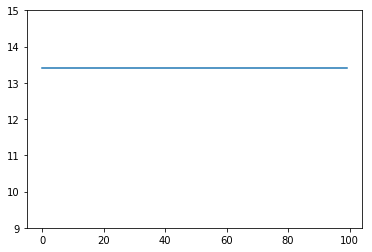

13.4146118164


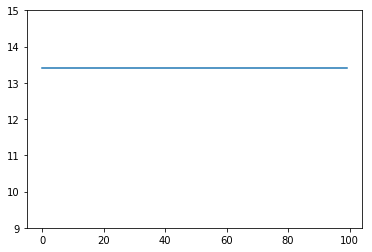

13.4146118164


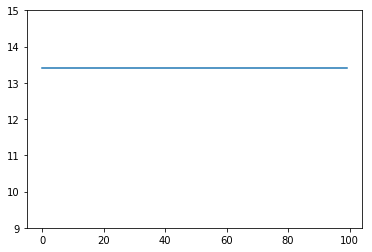

13.4146118164


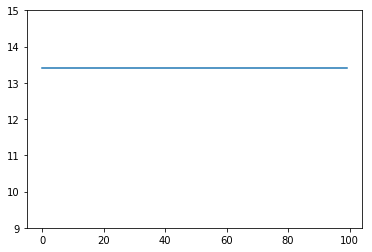

13.4146118164


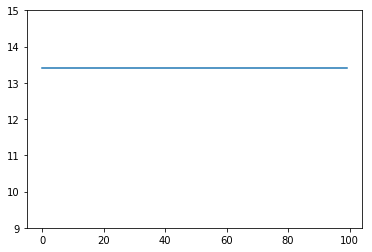

13.4146118164


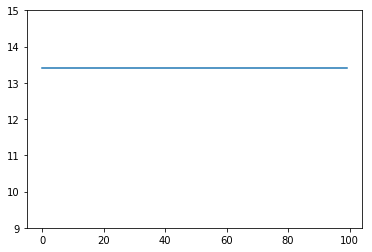

13.4146118164


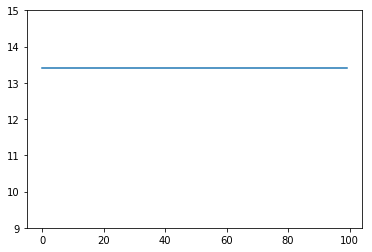

13.4146118164


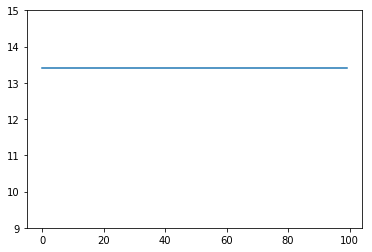

13.4146118164


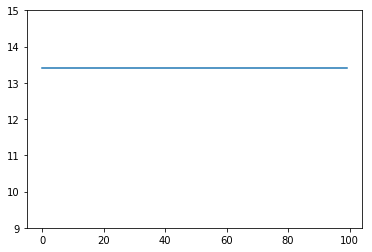

13.4146118164


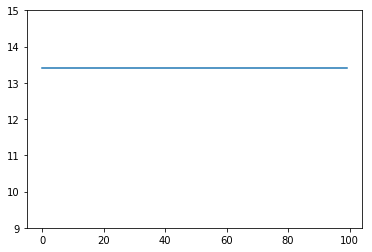

13.4146118164


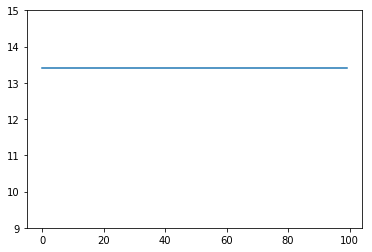

13.4146118164


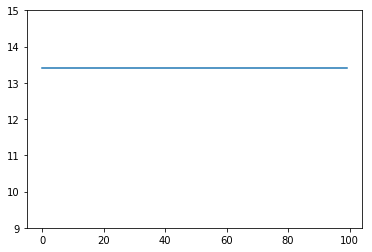

13.4146118164


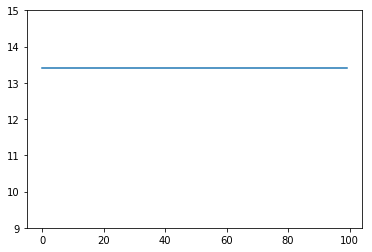

13.4146118164


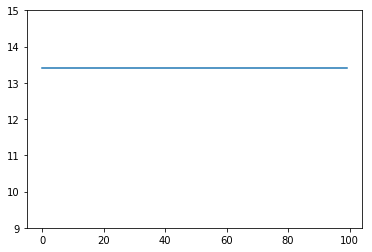

13.4146118164


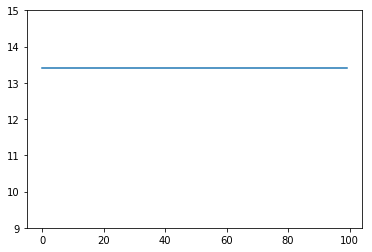

13.4146118164


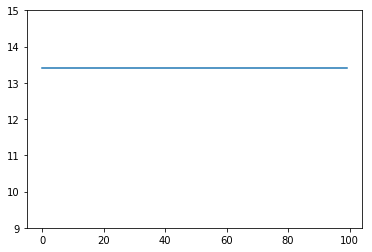

13.4146118164


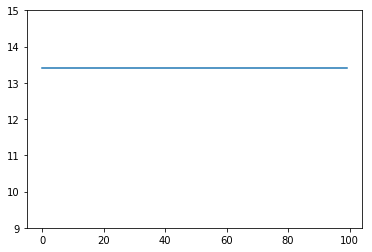

13.4146118164


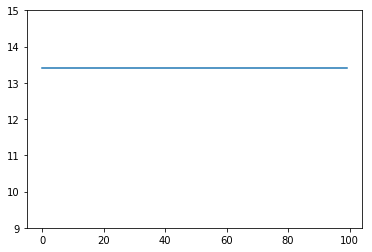

13.4146118164


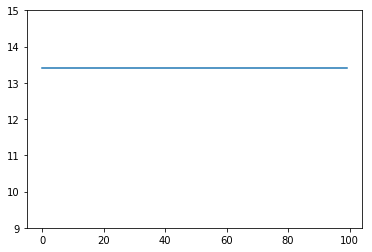

13.4146118164


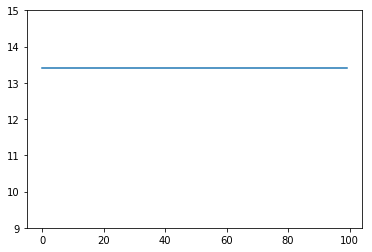

13.4146118164


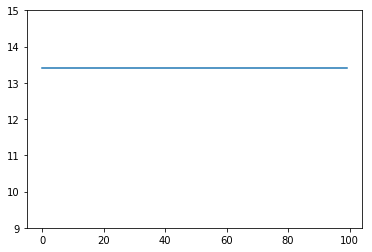

13.4146118164


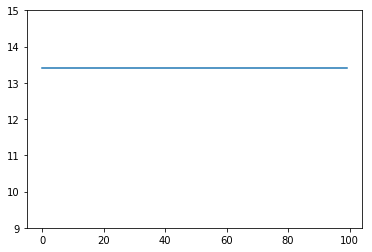

13.4146118164


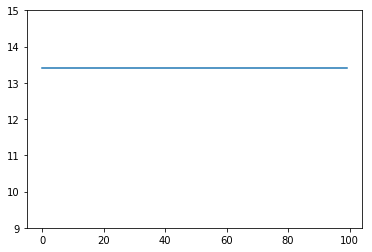

13.4146118164


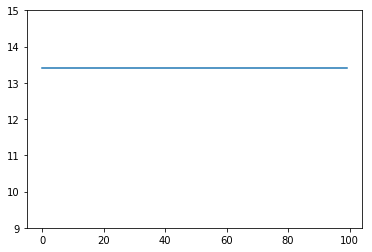

13.4146118164


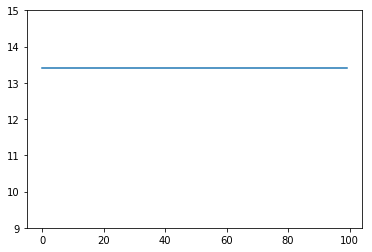

13.4146118164


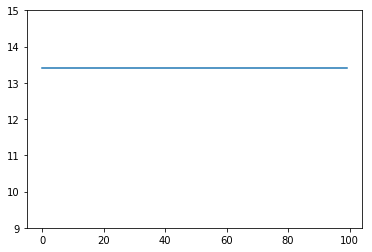

13.4146118164


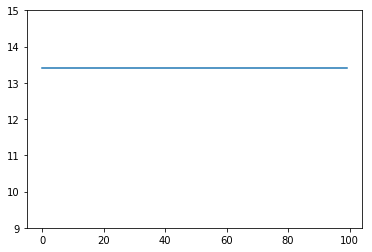

13.4146118164


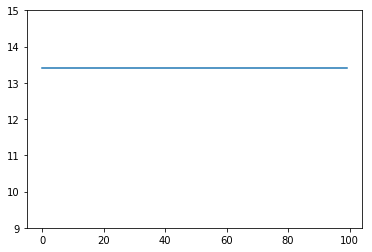

13.4146118164


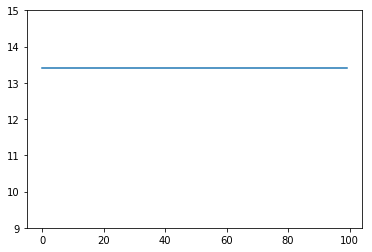

13.4146118164


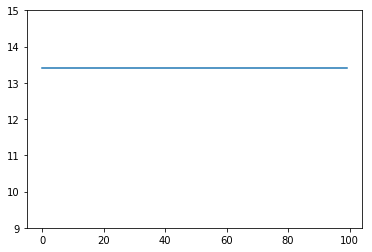

13.4146118164


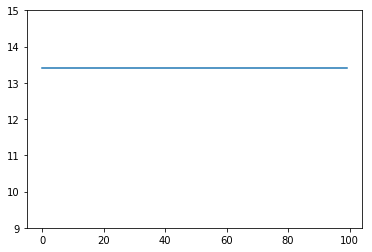

13.4146118164


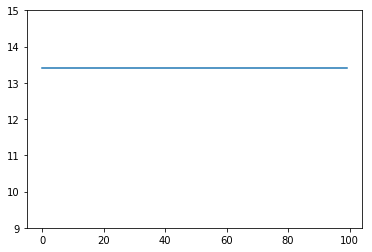

13.4146118164


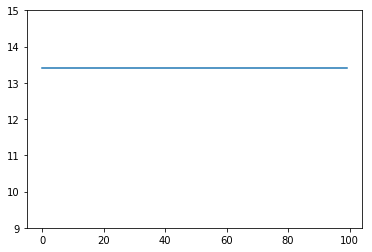

13.4146118164


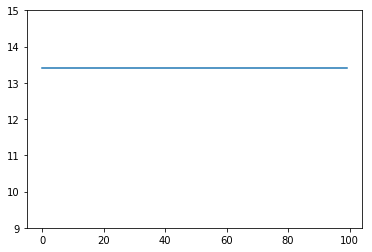

13.4146118164


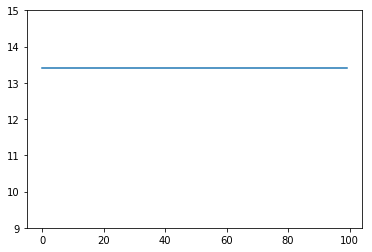

13.4146118164


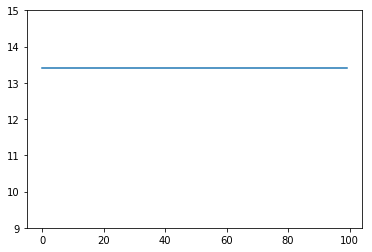

13.4146118164


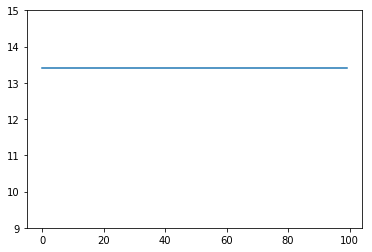

13.4146118164


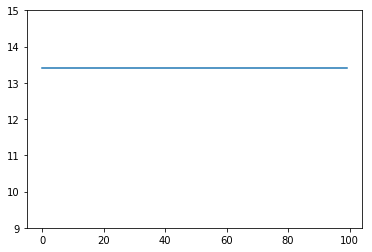

13.4146118164


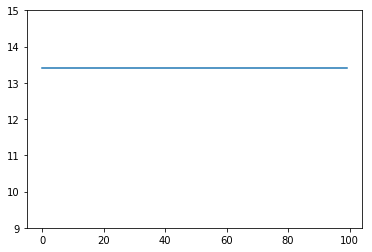

13.4146118164


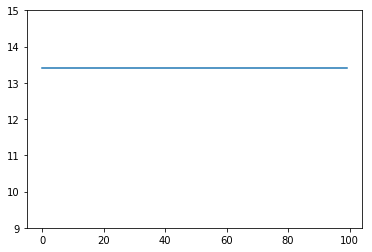

13.4146118164


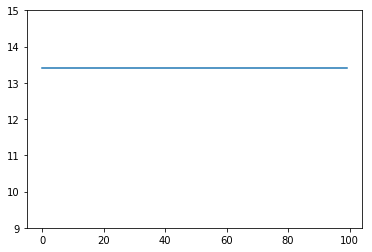

13.4146118164


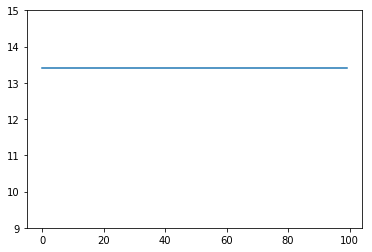

13.4146118164


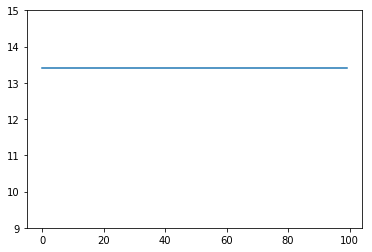

13.4146118164


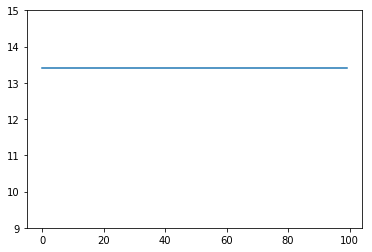

13.4146118164


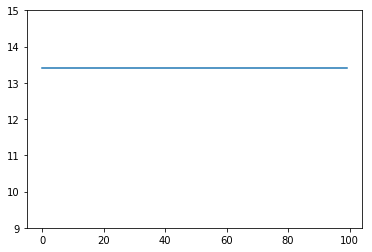

13.4146118164


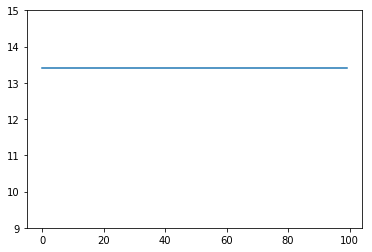

13.4146118164


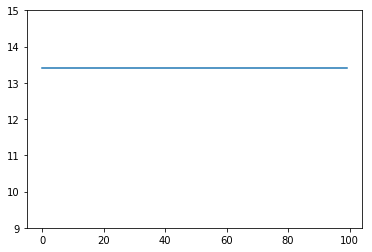

13.4146118164


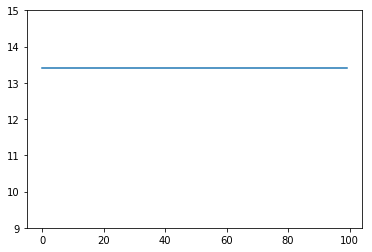

13.4146118164


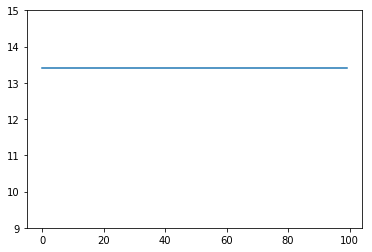

13.4146118164


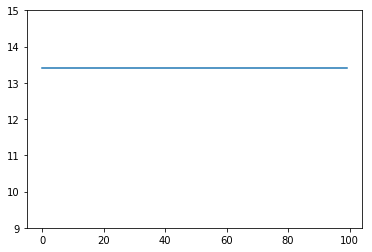

13.4146118164


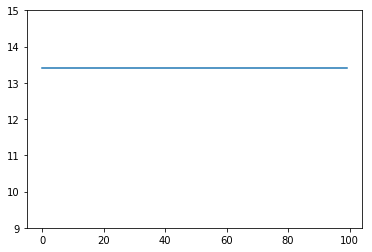

13.4146118164


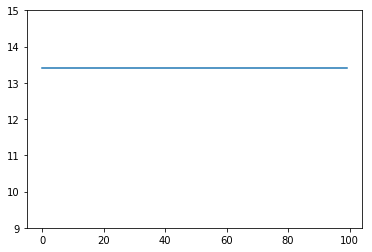

13.4146118164


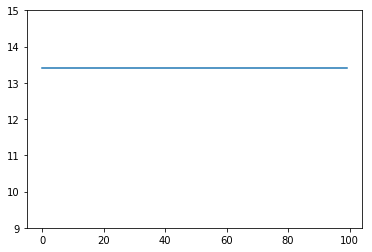

13.4146118164


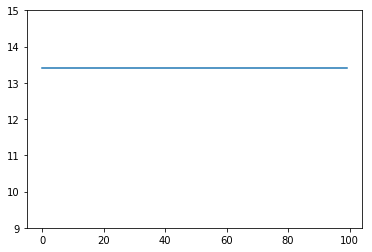

13.4146118164


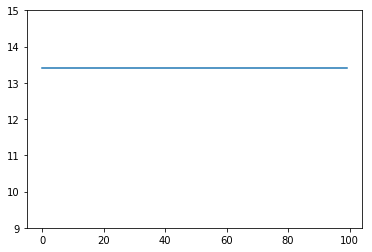

13.4146118164


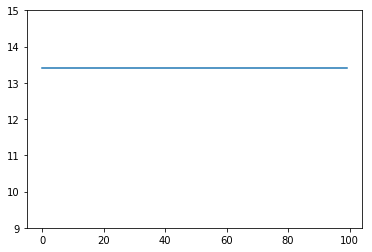

13.4146118164


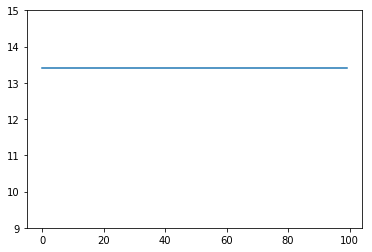

13.4146118164


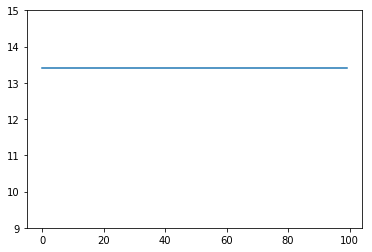

13.4146118164


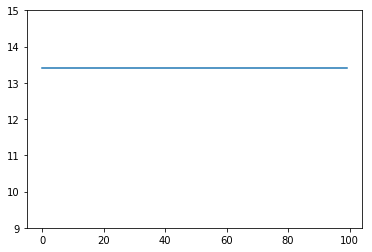

13.4146118164


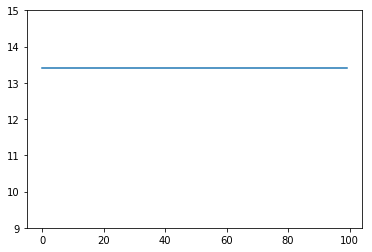

13.4146118164


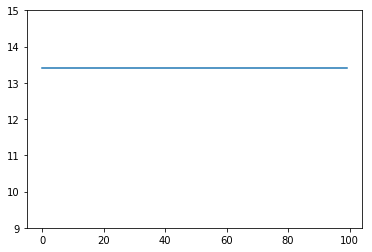

13.4146118164


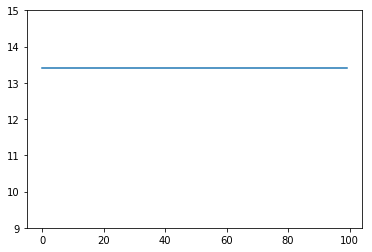

13.4146118164


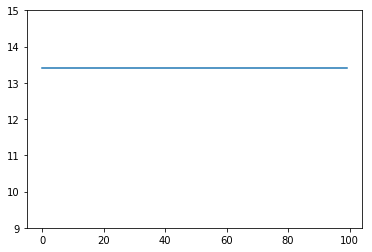

13.4146118164


In [19]:

import numpy as np
import matplotlib.pyplot as plt
import time
from drawnow import drawnow

s=Scope(yrange=[9,15],title='Voltage (V)')
try:
    while True:
        p.pull_status()
        s.step_display(p.status['voltage'])
        print(p.status['voltage'])
        time.sleep(0.02)
except (SystemExit, KeyboardInterrupt):
    p.stop()

In [ ]:
!python -m pip install plotly

In [ ]:
!pip install graph_objects

In [37]:
from IPython.display import display, clear_output
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 


num_points = 20
p.pull_status()
new_val = p.status['voltage']
print(new_val)

data = np.full(num_points, new_val)


while True:
    p.pull_status()
    new_val = p.status['voltage']
    print("new val is ", new_val)
    data=np.roll(data,-1)
    data[-1]=new_val
    
    time.sleep(0.03)
    
    
    ax.cla()
    ax.plot(data)
    ax.set_ylim([new_val-0.1,new_val+0.1])
    display(fig)
    
    clear_output(wait = True)
    plt.pause(0.5)

KeyboardInterrupt: 

In [14]:
import time
import plotly.graph_objects as go
import plotly.offline as pyo

fig = go.FigureWidget()
fig.add_scatter()



yrange=[9,15]
title='Voltage (V)'
num_points=100
data = list()

p.pull_status()
new_val = p.status['voltage']
print(new_val)
if data is None:
    data=[new_val] * num_points


try:
    while True:
        
        p.pull_status()
        new_val = p.status['voltage']
        print(new_val)
        if data is None:
            data=[new_val] * num_points
        data.append(new_val)
        time.sleep(0.03)

        for i in range(len(data)):
            with fig.batch_update():
                fig.data[0].y = data[:i]
    pyo.iplot(fig,filename = "Voltage")    
except (SystemExit, KeyboardInterrupt):
    p.stop()
    
    



13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164
13.4146118164


In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
from drawnow import drawnow

y = None
yrange=[9,15]
title='Voltage (V)'
num_points=100

fig = plt.figure()
fig.canvas.set_window_title(title)


ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
from jupyterplot import ProgressPlot
import numpy as np

pp = ProgressPlot()
for i in range(1000):
    pp.update(np.sin(i / 100))
pp.finalize()

        
try:
    while True:
        p.pull_status()
        new_val = p.status['voltage']
        
        if y is None:
            y=[new_val] * num_points
        y.append(new_val)
        y=y[1:]
        plt.plot(y)

        plt.ylim(yrange[0], yrange[1])
        drawnow
        
        print(p.status['voltage'])
        time.sleep(0.02)from jupyterplot import ProgressPlot
import numpy as np

pp = ProgressPlot()
for i in range(1000):
    pp.update(np.sin(i / 100))
pp.finalize()

except (SystemExit, KeyboardInterrupt):
    p.stop()


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
data = list()

while True:
    p.pull_status()
    print(p.status['voltage'])
    data.append(p.status['voltage'])
    print(data)
#     fig = plt.plot(data, x='time', y="Voltage (V)")
    
#     fig.show()

## current: Scope bus current (A)

temp: Scope base internal temperature (C)

ax: Scope base accelerometer AX

ay: Scope base accelerometer AY

az: Scope base accelerometer AZ

mx: Scope base magnetometer MX

my: Scope base magnetometer MY

mz: Scope base magnetometer MZ

gx: Scope base gyro GX

gy: Scope base gyro GY

gz: Scope base gyro GZ

roll: Scope base imu Roll

pitch: Scope base imu Pitch

heading: Scope base imu Heading

bump: Scope base imu bump level

In [ ]:
import stretch_body.scope as scope
import time
s=scope.Scope(yrange=[9,15],title='Voltage (V)')
try:
    while True:
        p.pull_status()
        s.step_display(p.status['voltage'])
        print(p.status['voltage'])
        time.sleep(0.02)
except (SystemExit, KeyboardInterrupt):
        p.stop()

# Wrapping Up

In this notebook, we've covered:

 * Classes and methods available in Stretch Body 
 * Fetching robot state from the `stretch_body.robot.Robot` class
 * Commanding motions to the various joints on the robot.

For more information on Stretch Body API, take a look at the [API Documentation](https://docs.hello-robot.com/stretch_body_guide/). To reports bugs or contribute to the library, visit the [Stretch Body Github repo](https://github.com/hello-robot/stretch_body/) where development on the library happens. Also, feel free to join our community on the [forum](https://forum.hello-robot.com/) and learn about research/projects happening with Stretch.

In [ ]:
r.stop()